# Spaceship Titanic - Kaggle competition

https://www.kaggle.com/competitions/spaceship-titanic

This notebook serves as an introduction for the class about supervised learning.
Students are introduced to predictive modeling. They build a Scikit-Learn pipeline and fit a simple DecisionTreeClassifier on the Spaceship Titanic dataset. The model is evaluated with a kaggle submission.



In [1]:
# pip install Pandas

We load the train data. The PassengerId column is used as the index of the dataframe

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv("Data/train.csv", index_col= "PassengerId")
train

/var/folders/rm/zd360c_n3394v5zq_gnyj9s00000gn/T/ipykernel_50362/609633651.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


## Preprocessing Pipeline

We identified null values in all columns. We will clean these by type.

In [4]:
train.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
# pip install scikit-learn

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

train = pd.read_csv("Data/train.csv", index_col= "PassengerId")

# Step 1: Define transformers for different column types
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean"))]
)

categorical_cols = ['HomePlanet', 'Destination', 'VIP', 'CryoSleep']
categorical_transformer = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Step 2: Create a ColumnTransformer that applies the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop' 
)

# Step 3: Assemble the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the DataFrame
X_train = preprocessing_pipeline.fit_transform(train)

preprocessing_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomePlanet', 'Destination',
                                                   'VIP', 'CryoSleep'])]))])

In [7]:
# Converting back to Pandas DataFrame
onehot_encoder_feature_names = list(preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out())
column_order =  numerical_cols + onehot_encoder_feature_names

# Show the cleaned DataFrame
pd.DataFrame(X_train, columns=column_order, index=train.index)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_False,VIP_True,VIP_nan,CryoSleep_False,CryoSleep_True,CryoSleep_nan
PassengerId,,,,,,,,,,,,,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9278_01,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Decision Tree Classifier 

We extend the pipeline with a decision tree classifier to predict the Transported variable.

In [8]:
from sklearn.tree import DecisionTreeClassifier

X = train.drop('Transported', axis=1)
y = train['Transported']

# Define the hyperparameters for the DecisionTreeClassifier
hyperparams = {
    'criterion': 'entropy',     # Function to measure the quality of a split
    'max_depth': 3,             # Limits the depth of the tree to prevent overfitting
    'min_samples_split': 20,    # The minimum number of samples required to split an internal node
    'min_samples_leaf': 10,     # The minimum number of samples required to be at a leaf node
    'random_state': 42          # Ensures reproducibility of the results
}

# Update the model pipeline with the new DecisionTreeClassifier parameters
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(**hyperparams))
])

# Fit the model
model_pipeline.fit(X, y)

model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomePlanet', 'Destination',
                                                   'VIP', 'CryoSleep'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [9]:
# pip install matplotlib

### Tree visualiation

We use matplotlib library to plot the tree we just fitted

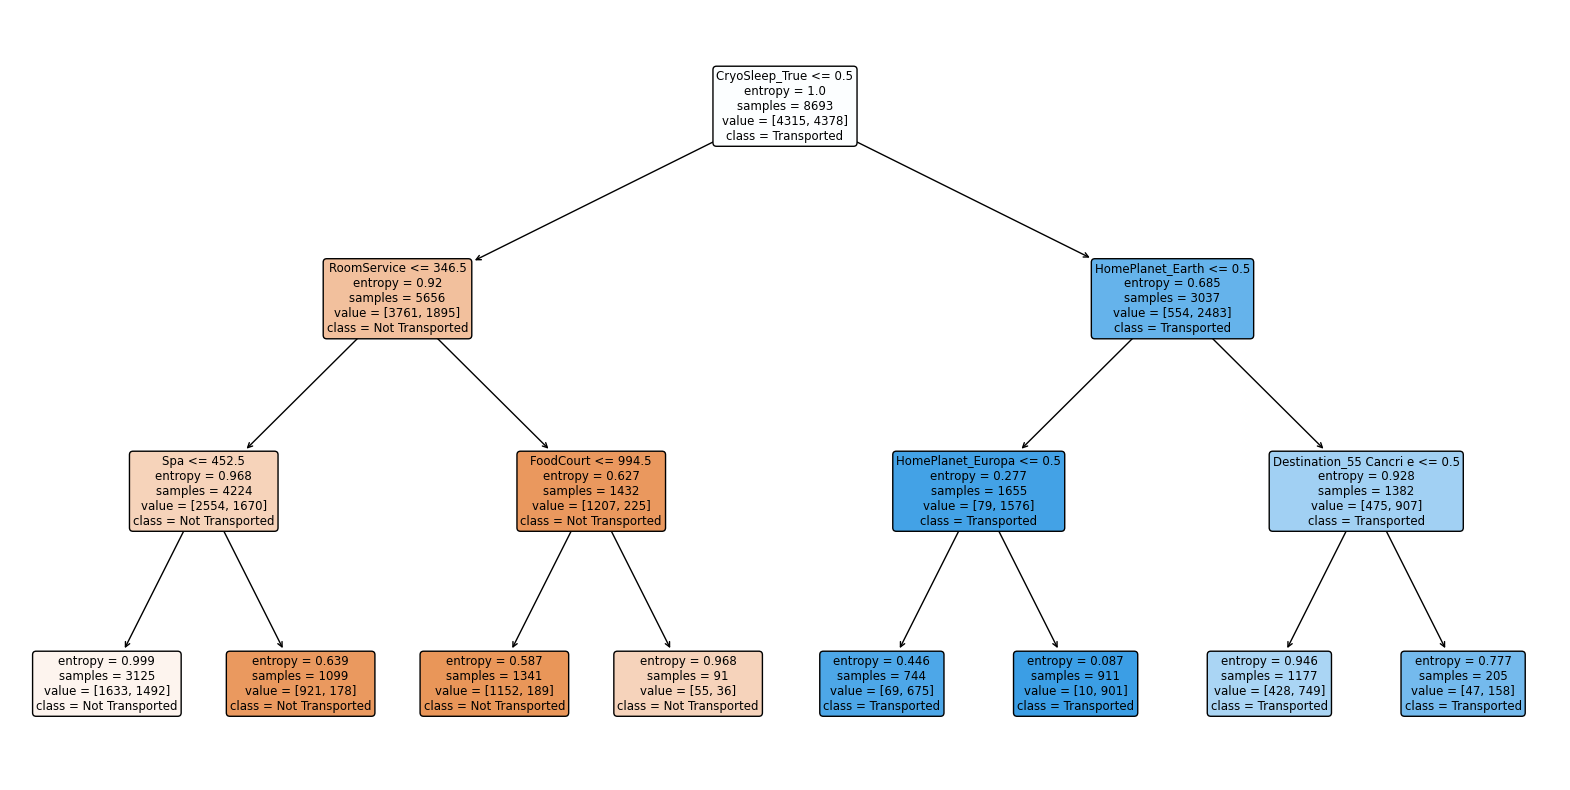

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract the decision tree model
decision_tree_model = model_pipeline.named_steps['classifier']

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, 
          filled=True, 
          rounded=True,
          class_names=['Not Transported', 'Transported'],
          feature_names=column_order)  # Ensure 'column_order' matches the order of features in the trained model
plt.show()

# Evaluation on Kaggle

In [11]:
test = pd.read_csv("Data/test.csv", index_col= "PassengerId")

test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


In [12]:
X_test = test

y_pred = model_pipeline.predict(X_test)

kaggle_submission = pd.DataFrame(y_pred, columns=['Transported'], index=X_test.index)
kaggle_submission

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,False
0023_01,False
...,...
9266_02,True
9269_01,False
9271_01,True


In [13]:
# Writing the submission DataFrame to a CSV file
kaggle_submission.to_csv("Data/simple_decision_tree.csv", index=True)